In [11]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

import json
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [17]:
consumer_key = "tnjNfG713OK9spEtT7IqxNdUR"
consumer_secret = "NJ62QwHyMn2RgAUkwxJRkWz7N2SyUxIM0oBqF6GCy2EHjTBLJ2"

   
access_token = '752314166765981696-2mckoC7MWKp4Us1MJjIkF1xT9Y6c9GO'
access_token_secret =    "XVYXJrPJnnmqVXmSrc6fAR1yfqoIPP4DkpkOIzEsFgF2D"
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)


In [18]:
target_user = ['@BBCNews','@CBSNews','@CNN','@FoxNews','@NYT']

In [54]:
accounts_df = pd.DataFrame({'@BBCNews':'',
                   '@CBSNews':'',
                   '@CNN':'',
                   '@FoxNews':'',
                   '@NYT':''}, index=[0])


In [55]:
for user in target_user:
    counter = 0
    for page in tweepy.Cursor(api.user_timeline,id=user).items(100):
        tweet = page.text
        compound = analyzer.polarity_scores(tweet)["compound"]
        accounts_df.set_value(counter,user,compound)
        counter=counter+1
accounts_df.head()



,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT
0,-0.1531,0,0.2023,-0.3182,-0.5994
1,-0.3818,0.2878,0,0.4939,0
2,0,0,-0.2382,0,0
3,0,0.6369,-0.4767,0,0
4,0,0.2732,0.4019,0,0.4404


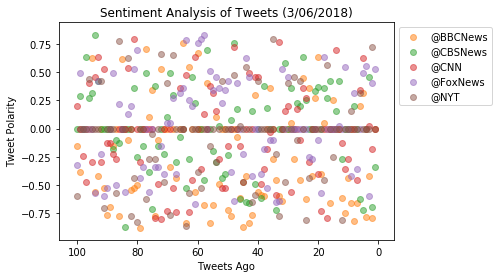

In [71]:
x = np.arange(100, 0, -1)

BBCNews_handle = plt.scatter(x, accounts_df['@BBCNews'], alpha=0.5)
CBSNews_handle = plt.scatter(x, accounts_df['@CBSNews'], alpha=0.5)
CNN_handle = plt.scatter(x, accounts_df['@CNN'], alpha=0.5)
FoxNews_handle = plt.scatter(x, accounts_df['@FoxNews'], alpha=0.5)
NYT_handle = plt.scatter(x, accounts_df['@NYT'], alpha=0.5)

plt.title('Sentiment Analysis of Tweets (3/06/2018)')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')

plt.legend(handles=[BBCNews_handle, CBSNews_handle, CNN_handle, FoxNews_handle, NYT_handle ], loc="upper right")
plt.gca().invert_xaxis()
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('sentiment_plot.png')
plt.show()



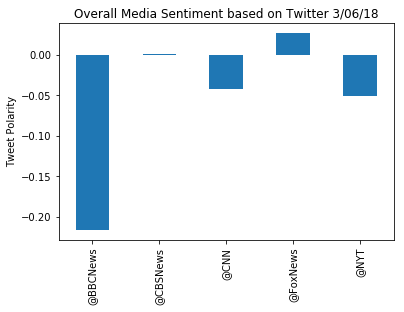

In [82]:
avg_account = accounts_df.mean()
avg_account.plot(kind='bar')
plt.title('Overall Media Sentiment based on Twitter 3/06/18')
plt.ylabel('Tweet Polarity')
plt.show()
plt.savefig('Sentiment_avg.png')